# Principal Components Analysis lab

## Objective

In this lab, we'll use PCA to transform a dataset by computing a covariance matrix and performing eigendecomposition.

## 1. Introduction and data

Let's ease into the concept of Principal Component Analysis by looking at a first data set. This first data set contains the Estimated Retail Prices by Cities in March 1973. The numbers listed are the average price by cents in pounds. 

In [1]:
import pandas as pd
import numpy as np
#from sklearn.decomposition import PCA
#import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

In the cell below, read in the data from `foodusa.csv` and store in in a pandas DataFrame.  Be sure to set `index_col` to `0`.

In [2]:
data = pd.read_csv('foodusa.csv', index_col=0)

Now, display the dataset to ensure everything loaded correctly. 

In [3]:
data

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2
CINCINNATI,25.3,102.5,63.3,99.3,45.6
CLEVELAND,22.8,88.8,52.4,110.9,46.8
DALLAS,23.3,85.5,62.5,117.9,41.8
DETROIT,24.1,93.7,51.5,109.7,52.4


As you know from the lecture, we'll perform an eigendecomposition to transform the data. 
Before doing so, two things are of main importance when 
We'll first perform 2 steps:

1. Let's look at the current correlation structure of the data and see if anything stands out.
2. Let's also look at the data distributions and make sure we standardize our data first. As mentioned, we would like to get our data on a unit scale, if we want to get optimal PCA performance in the long run. 

## 2. The correlation structure

Before we start, let's have a quick exploratory look at the data. Let's generate the correlation heatmap to see if we can detect anything extraordinary.

Run the cells below to create a Correlation Heatmap of our dataset. 

In [4]:
names = list(data)

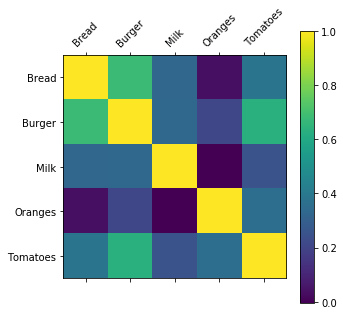

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
mat = ax.matshow(data.corr())
ax.set_xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0,5,1))
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
fig.colorbar(mat)
plt.show();

This heatmap is useful for tracking unusual correlations. There is nothing really unexpected about this correlation matrix. The diagonal has correlation 1, which makes sense, and all the other correlations seem to be somewhere between 0 and 0.8. 

In order to perform a succesful PCA, you'd want to have some higher correlations among variables (which seems to be the case here, eg burger/bread and burger/tomatoes) so dimensionality reduction makes sense. If all variables would be uncorrelated, it would be hard to use PCA in order to reduce dimensionality. On the other hand, if variables are perfect correlates, you should just go ahead and remove columns instead of performing PCA.

## 3. Explore the data distributions

Let's use `.describe()` to get a sense of our data distributions.

In [6]:
data.describe()

,Bread,Burger,Milk,Oranges,Tomatoes
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,25.291304,91.856522,62.295652,102.991304,48.765217
std,2.506884,7.554940,6.950244,14.239252,7.602668
min,20.300000,77.700000,51.500000,74.600000,35.400000
25%,23.700000,86.900000,57.650000,95.400000,42.800000
50%,25.300000,91.000000,62.500000,105.900000,46.800000
75%,26.500000,94.150000,66.000000,111.350000,52.850000
max,30.800000,110.700000,80.200000,133.200000,62.600000


Let's also plot some histograms of the distribution of our dataset.  

In the cell below, create a histogram of the `data`.  Pass in the following parameters:

* `bins=6`
* `xlabelsize=8`
* `ylabelsize=8`
* `figsize=(8,8)`

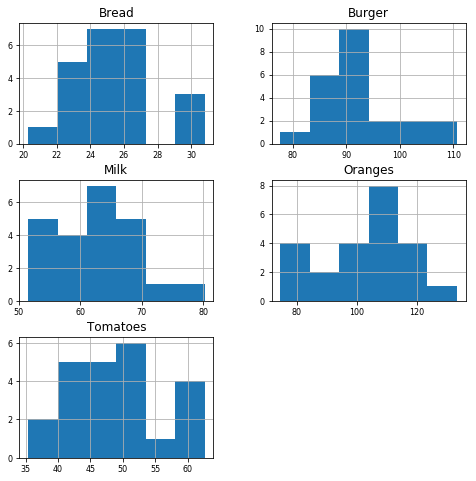

In [7]:
ax = data.hist(bins=6, xlabelsize=8, ylabelsize= 8, figsize=(8,8))

These distributions look approximately normal (note that there are only 23 observations, so it is to be expected that the curves are not perfectly bell-shaped!). 

Now, let's go ahead and standardize the data. We'll do this manually at first to understand what is going on in the process. 

### 3.1 standardize manually

In the cell below, compute the following values and store them in the appropriate variables.

1. The `mean` of the `data`.
1. The standard error of the `data`.
1. A standardized version of the dataset, where each value has had the `avg` subtracted, and then divided by the `std_err`.  

In [8]:
avg = data.mean()
std_err = data.std()
data_std= (data - avg)/ std_err

Now, display the head of the standardized dataset.

In [9]:
data_std.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,-0.315653,0.349901,1.669632,-1.607620,-0.942461
BALTIMORE,0.482151,-0.113372,0.748801,-1.993876,0.596473
BOSTON,1.758636,1.183792,-0.128866,0.070839,1.425129
BUFFALO,-0.993785,-0.695773,0.432265,1.082128,0.320254
CHICAGO,0.561931,-0.682536,0.058178,0.204273,0.320254


Finally, let's display histograms of this dataset, as we did with the original above.  Pass in the same parameters as you did above when creating these histograms.  

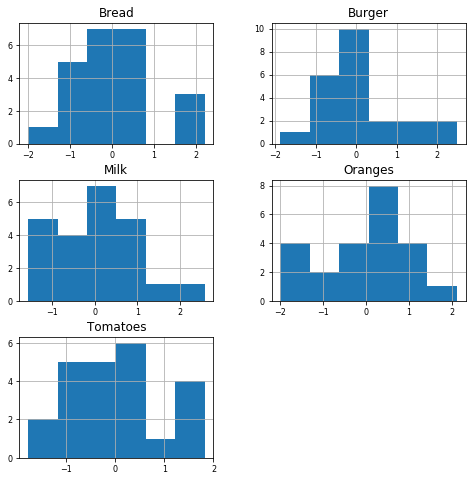

In [10]:
ax = data_std.hist(bins=6, xlabelsize=8, ylabelsize= 8, figsize=(8,8))

It seems like nothing really changed here, but be aware of what happened to the x-axis!

### 3.2 Another way to standardize the data

Since this is a common operation, sklearn provides an easy way to scale and transform our dataset by using a `StandardScaler` object's `fit_transform()` method.

Run the cell below to use sklearn to create a scaled version of the dataset, and then inspect the head of this new DataFrame to see how it compares to the dataset we scaled manually.

In [11]:
from sklearn.preprocessing import StandardScaler
data_std_2 = StandardScaler().fit_transform(data)
data_std_2 = pd.DataFrame(data_std_2)

In [12]:
data_std_2.head()

,0,1,2,3,4
0,-0.322747,0.357765,1.707156,-1.643751,-0.963643
1,0.492987,-0.115920,0.765630,-2.038688,0.609878
2,1.798161,1.210398,-0.131763,0.072431,1.457158
3,-1.016120,-0.711410,0.441980,1.106449,0.327451
4,0.574560,-0.697876,0.059485,0.208864,0.327451


Note that you have to reattach the names of the columns.

Run the cell below to reattach the column names.

In [13]:
data_std_2.columns = list(data)

In [14]:
data_std_2.head()

,Bread,Burger,Milk,Oranges,Tomatoes
0,-0.322747,0.357765,1.707156,-1.643751,-0.963643
1,0.492987,-0.115920,0.765630,-2.038688,0.609878
2,1.798161,1.210398,-0.131763,0.072431,1.457158
3,-1.016120,-0.711410,0.441980,1.106449,0.327451
4,0.574560,-0.697876,0.059485,0.208864,0.327451


Finally, create another set of histograms, this time on `data_std_2`.  Use the same parameters as we have above. 

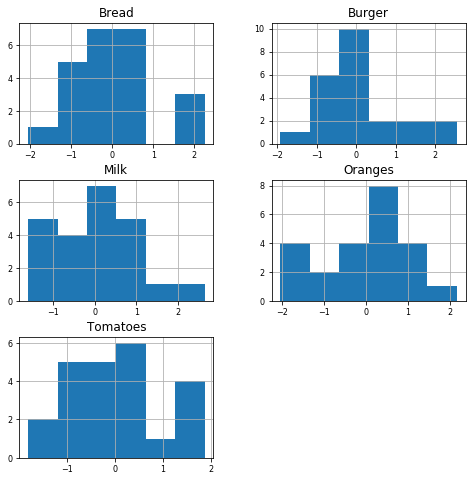

In [15]:
ax = data_std_2.hist(bins=6, xlabelsize= 8, ylabelsize= 8 , figsize=(8,8))

Note that the results differ slightly. When using StandardScaler, centering and scaling happen independently on each feature by computing the relevant statistics. Mean and standard deviation are then stored to be used on later data using the transform method. You can look at the histograms again, but it is expected to look exactly the same again.

## 4. The correlation matrix

**_NOTE:_** This section contains **_a lot_** of math.  Understanding how the math behind PCA and eigendecomposition works is important, because it provides great insight  into how the algorithm actually works under the hood, and can inform our use to make sure we're using PCA correctly. 

With that being said, don't feel overwhelmed--on the job, you'll almost never compute this manually. Instead, you'll rely on heavily optimized, industry-standard tools such as sklearn to transform data with PCA.  

We've actually looked at the heatmap already, but now let's formally compute the correlation matrix. As you saw in the lecture, the sample covariance matrix is given by:

\begin{equation}
\mathbf{S} = \begin{bmatrix}
    s^2_{1} & s_{12}  & \dots  & s_{1p} \\
    s_{21} & s^2_{2}  & \dots  & s_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    s_{p1} & s_{p2} & \dots  & s^2_{p}
\end{bmatrix}
\end{equation}

with

$$s_{jk} = \dfrac{\sum_{i=1}^n (X_{ij}-\bar X_{.j})(X_{ij}-\bar X_{.k})}{n-1}= \dfrac{\sum_{i=1}^n x_{ij}x_{ik}}{n-1}$$

Everything became actually easier now that we're working with standardized variables here, so we can get to the correlations as follows:
$r_{jk} = \dfrac{\sum_{i=1}^n z_{ij}z_{ik}}{n-1}$.

We know that we can use the .corr-function, but it's a good exercise to do this manually in Python. You can use the `.dot`-function:

In [16]:
cov_mat = (data_std.T.dot(data_std)) / (data_std.shape[0]-1)

In [17]:
cov_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,1.000000,0.681700,0.328239,0.036709,0.382241
Burger,0.681700,1.000000,0.333422,0.210937,0.631898
Milk,0.328239,0.333422,1.000000,-0.002779,0.254417
Oranges,0.036709,0.210937,-0.002779,1.000000,0.358061
Tomatoes,0.382241,0.631898,0.254417,0.358061,1.000000


Or, even easier, we can make use of the `.cov` function inside of numpy, and just pass in the transposed version of our data.  

In [18]:
np.cov(data_std.T)

array([[ 1.        ,  0.68170049,  0.32823868,  0.03670916,  0.38224129],
       [ 0.68170049,  1.        ,  0.33342167,  0.21093676,  0.63189831],
       [ 0.32823868,  0.33342167,  1.        , -0.00277912,  0.2544167 ],
       [ 0.03670916,  0.21093676, -0.00277912,  1.        ,  0.3580615 ],
       [ 0.38224129,  0.63189831,  0.2544167 ,  0.3580615 ,  1.        ]])

## 5.  Eigendecomposition in Python

In Python, numpy stores quite a few linear algebra functions which makes eigendecomposition easy, stored inside the `linalg` module.  

In the cell below, call `linalg.eig()` and pass in the covariance matrix we computed above, `cov_mat`.  

Note that this function returns 2 values:

1. An 1-d array of eigenvalues
1. A 2-d array of eigenvectors

In [19]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)

Now, let's inspect the eiginvalues and eigenvectors this function returned:

In [20]:
eig_values

array([2.42246795, 1.10467489, 0.2407653 , 0.73848053, 0.49361132])

In [21]:
eig_vectors

array([[ 0.49614868,  0.30861972,  0.49989887,  0.38639398, -0.50930459],
       [ 0.57570231,  0.04380176, -0.77263501,  0.26247227,  0.02813712],
       [ 0.33956956,  0.43080905, -0.00788224, -0.83463952, -0.0491    ],
       [ 0.22498981, -0.79677694,  0.0059668 , -0.29160659, -0.47901574],
       [ 0.50643404, -0.28702846,  0.39120139,  0.01226602,  0.71270629]])

And finally, we'll use a list comprehension to compute the eigenpairs.  Run the cell below. 

In [22]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

In [23]:
eig_pairs

[(2.4224679507118134,
  array([0.49614868, 0.57570231, 0.33956956, 0.22498981, 0.50643404])),
 (1.1046748929130334,
  array([ 0.30861972,  0.04380176,  0.43080905, -0.79677694, -0.28702846])),
 (0.24076530483587502,
  array([ 0.49989887, -0.77263501, -0.00788224,  0.0059668 ,  0.39120139])),
 (0.738480531992392,
  array([ 0.38639398,  0.26247227, -0.83463952, -0.29160659,  0.01226602])),
 (0.49361131954688525,
  array([-0.50930459,  0.02813712, -0.0491    , -0.47901574,  0.71270629]))]

### 5.1  Check if the squared norms are equal to 1

In [24]:
for eigvec in eig_vectors:
    print(np.linalg.norm(eigvec))

0.9999999999999998
1.0
1.0
0.9999999999999999
1.0000000000000002


or, alternatively

In [25]:
sum(np.square(eig_vectors))

array([1., 1., 1., 1., 1.])

### 5.2 Let's check if our eigenvectors are uncorrelated. 

Run the cells below to create a correlation heatmap as we did at the top of the lab, but this time on a correlation matrix of the eigenvectors we've computed.  

In [26]:
eig_vectors

array([[ 0.49614868,  0.30861972,  0.49989887,  0.38639398, -0.50930459],
       [ 0.57570231,  0.04380176, -0.77263501,  0.26247227,  0.02813712],
       [ 0.33956956,  0.43080905, -0.00788224, -0.83463952, -0.0491    ],
       [ 0.22498981, -0.79677694,  0.0059668 , -0.29160659, -0.47901574],
       [ 0.50643404, -0.28702846,  0.39120139,  0.01226602,  0.71270629]])

In [27]:
eig_vectors = pd.DataFrame(eig_vectors)

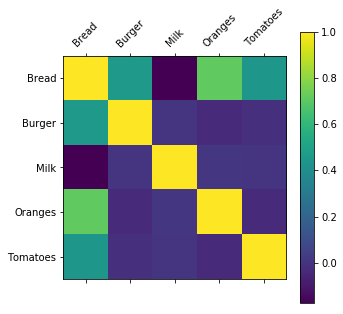

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
mat = ax.matshow(eig_vectors.corr())
ax.set_xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0,5,1))
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
fig.colorbar(mat)
plt.show();

In [29]:
eig_vectors.corr()

,0,1,2,3,4
0,1.000000,0.454959,-0.175050,0.713220,0.448798
1,0.454959,1.000000,0.007080,-0.028847,-0.018152
2,-0.175050,0.007080,1.000000,0.011099,0.006984
3,0.713220,-0.028847,0.011099,1.000000,-0.028457
4,0.448798,-0.018152,0.006984,-0.028457,1.000000


Great, you got to the end of this lab! You know how to transform your data now. But what's the use and what does this all mean? You'll find out in the next lecture and lab!

## Sources

https://data.world/exercises/principal-components-exercise-1

https://data.world/craigkelly/usda-national-nutrient-db

https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/